In [2]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
db_path = "../data/MADE_Project.sqlite"

# Load Data

In [4]:
with sqlite3.connect(db_path) as conn:
    df_co2 = pd.read_sql_query(f"SELECT * FROM CO2_Emission", conn)
    df_rnew = pd.read_sql_query(f"SELECT * FROM Renewable_Energy_Consumption", conn)

In [5]:
metadata = pd.read_csv("../data/Metadata_Country_API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_14541.csv")

In [6]:
region_code = metadata[metadata["Region"].isna()]["Country Code"].tolist()

In [7]:
df_co2_country = df_co2[~df_co2["Country Code"].isin(region_code)].reset_index(drop=True)
df_co2_group = df_co2[df_co2["Country Code"].isin(region_code)].reset_index(drop=True)

df_rnew_country = df_rnew[~df_rnew["Country Code"].isin(region_code)].reset_index(drop=True)
df_rnew_group = df_rnew[df_rnew["Country Code"].isin(region_code)].reset_index(drop=True)

In [8]:
df_long_co2 = pd.melt(df_co2_country, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='CO2_Emission')
df_long_co2['Year'] = df_long_co2['Year'].astype(int)

df_long_rnew = pd.melt(df_rnew_country, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Renewable_Energy_Percentage')
df_long_rnew['Year'] = df_long_rnew['Year'].astype(int)


In [9]:
df_long_co2_group = pd.melt(df_co2_group, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='CO2_Emission')
df_long_co2_group['Year'] = df_long_co2_group['Year'].astype(int)

df_long_rnew_group = pd.melt(df_rnew_group, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Renewable_Energy_Percentage')
df_long_rnew_group['Year'] = df_long_rnew_group['Year'].astype(int)

In [10]:
income_group = ["High income", "Middle income", "Low income"]
df_co2_income_group = df_long_co2_group[df_long_co2_group["Country Name"].isin(income_group)]
df_rnew_income_group = df_long_rnew_group[df_long_rnew_group["Country Name"].isin(income_group)]

# CO2 Emission

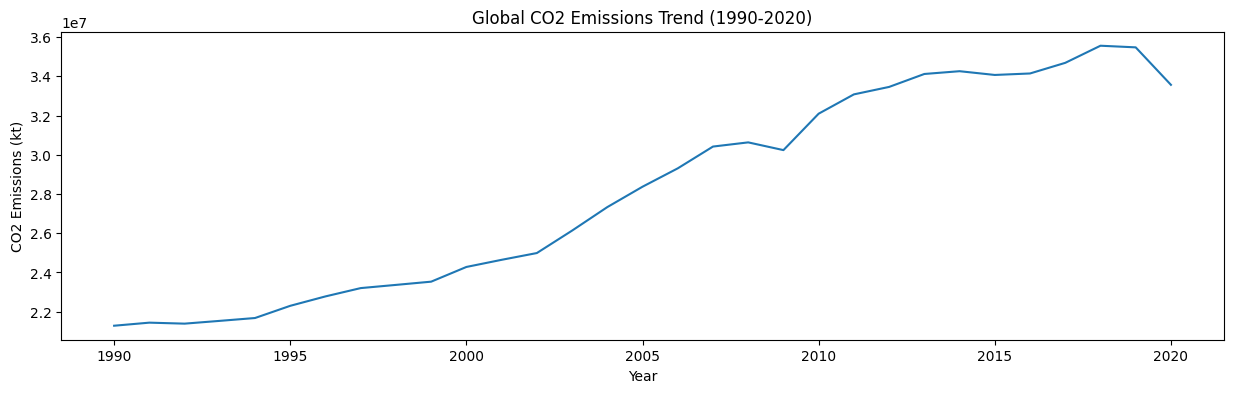

In [11]:
df_world = df_long_co2_group[df_long_co2_group["Country Name"]=="World"]
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_world, x='Year', y='CO2_Emission', hue='Country Name')
plt.title('Global CO2 Emissions Trend (1990-2020)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.legend([],[], frameon=False)
plt.show()

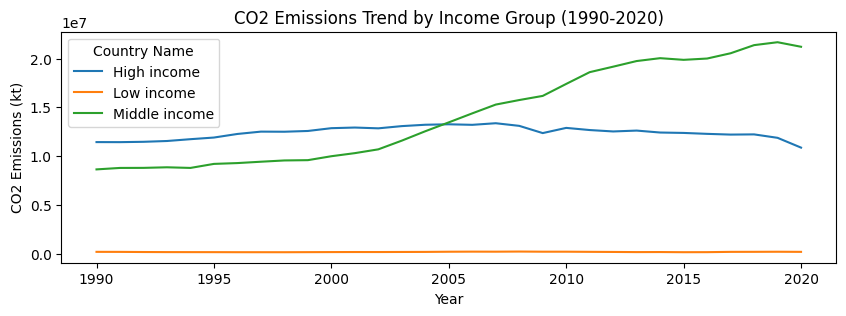

In [12]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=df_co2_income_group, x='Year', y='CO2_Emission', hue='Country Name')
plt.title('CO2 Emissions Trend by Income Group (1990-2020)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')

plt.show()

In [184]:
df_co2['Percentage Change'] = -((df_co2['2020'] - df_co2['1990']) / df_co2['1990']) * 100
top_decrease_countries = df_co2.nlargest(11, 'Percentage Change')["Country Name"]

In [249]:
decrease_countries = top_decrease_countries.to_list()
decrease_countries.remove("Nauru")

Text(0.5, 1.0, 'Top 10 Countries with the Largest Reduction in CO2 Emissions (1990-2020)')

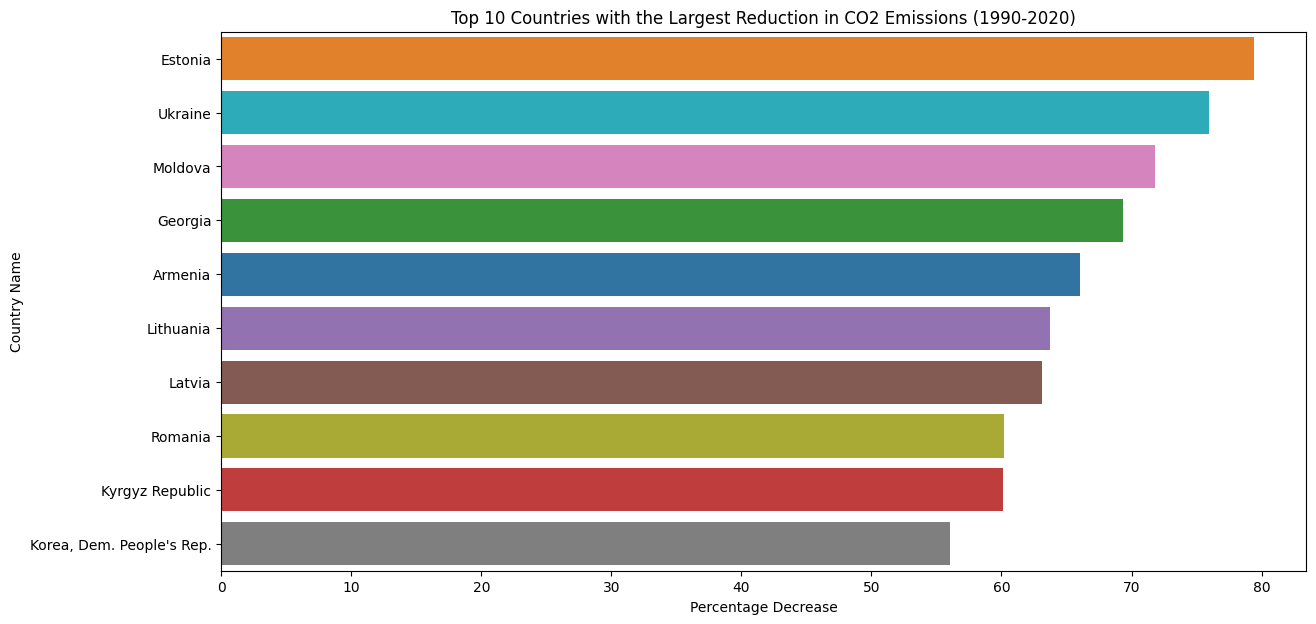

In [197]:
plt.figure(figsize=(14, 7))
df_co2_decrease = df_co2[df_co2["Country Name"].isin(decrease_countries)]
sns.barplot(df_co2_decrease, y="Country Name", x="Percentage Change", hue="Country Name", order=df_co2_decrease.sort_values("Percentage Change", ascending=False)["Country Name"])
plt.xlabel("Percentage Decrease")
plt.title("Top 10 Countries with the Largest Reduction in CO2 Emissions (1990-2020)")

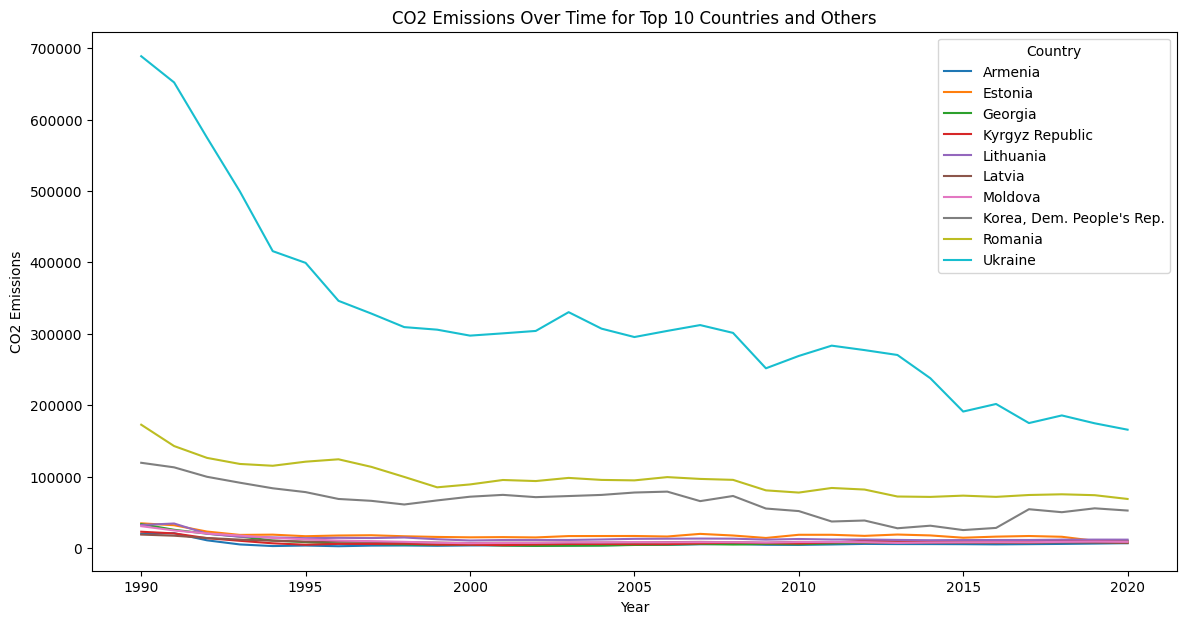

In [174]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top_10_decrease, x='Year', y='CO2_Emission', hue='Country Name')
plt.title('CO2 Emissions Over Time for Top 10 Countries and Others')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend(title='Country')
plt.show()

In [10]:
total_emissions = df_long_co2.groupby('Country Name')['CO2_Emissions'].sum().reset_index()

# Select the top 10 countries based on their total emissions
top_countries = total_emissions.nlargest(10, 'CO2_Emissions')['Country Name']

# Filter the dataframe to include only the top 10 countries
df_top10 = df_long_co2[df_long_co2['Country Name'].isin(top_countries)]

In [11]:
# Aggregate the emissions of the remaining countries as "Others"
df_others = df_long_co2[~df_long_co2['Country Name'].isin(top_countries)]

df_others_aggregated = df_others.groupby('Year')['CO2_Emissions'].sum().reset_index()
df_others_aggregated['Country Name'] = 'Others'
df_others_aggregated['Country Code'] = 'OTH'

In [12]:
df_combined = pd.concat([df_top10, df_others_aggregated], ignore_index=True)


In [221]:
top_10_co2 = df_top10["Country Name"].unique().tolist()

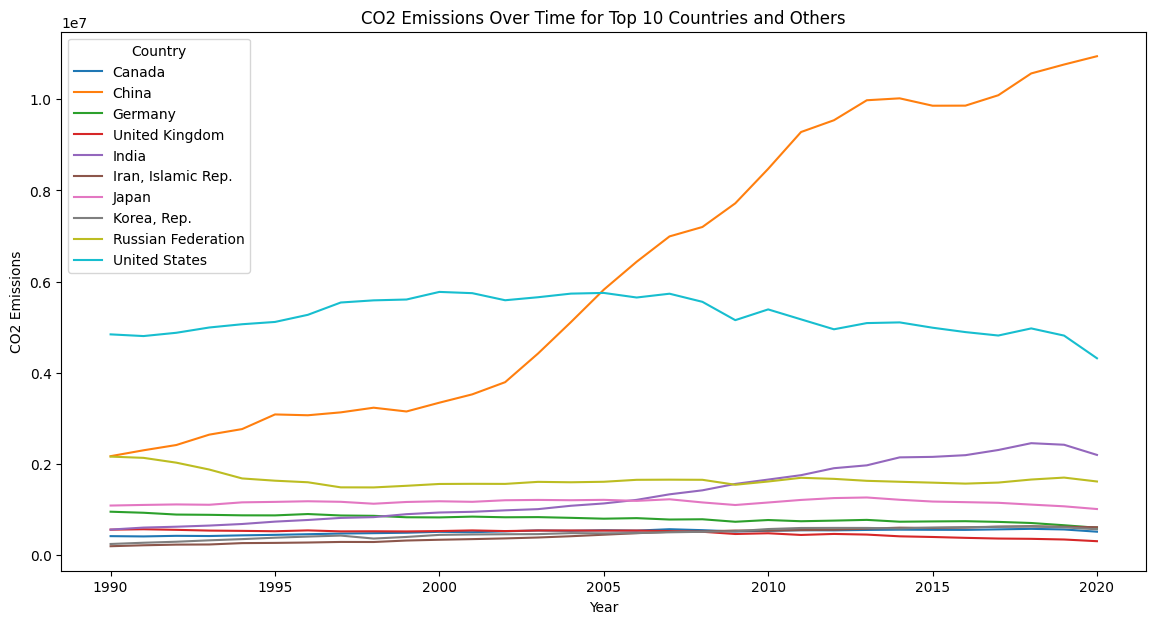

In [13]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top10, x='Year', y='CO2_Emissions', hue='Country Name')
plt.title('CO2 Emissions Over Time for Top 10 Countries and Others')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend(title='Country')
plt.show()

In [245]:
df_top10_decrease = df_long_co2[df_long_co2['Country Name'].isin(top_decrease_countries)]

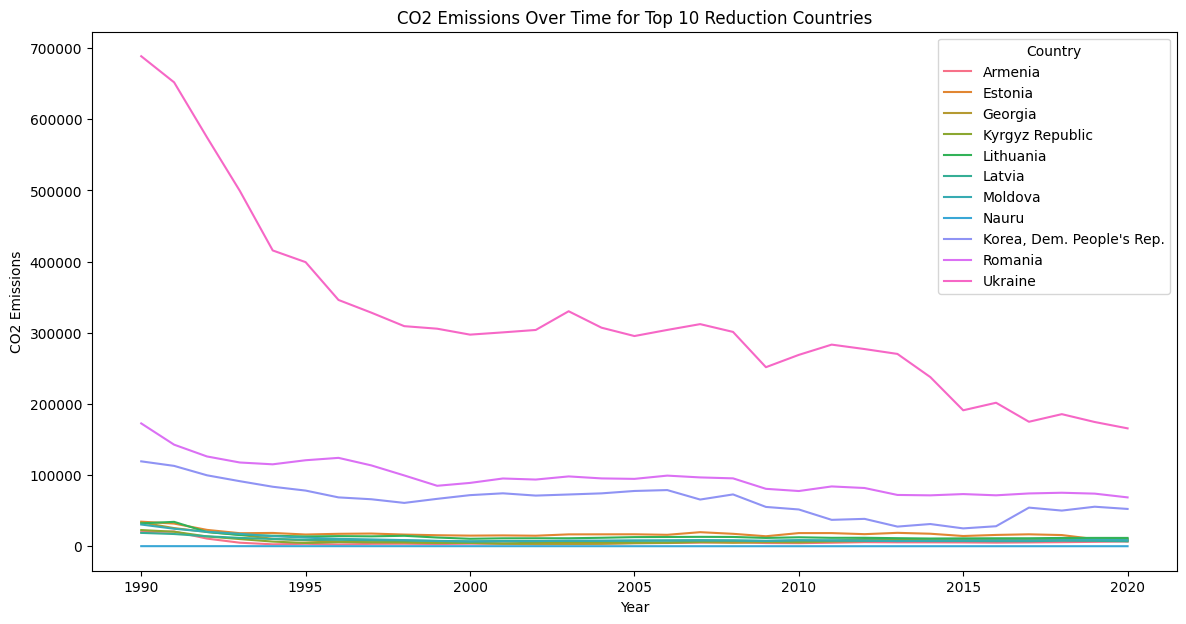

In [248]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top10_decrease, x='Year', y='CO2_Emission', hue='Country Name')
plt.title('CO2 Emissions Over Time for Top 10 Reduction Countries')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend(title='Country')
plt.show()

In [ ]:
total_emissions = df_long_co2.groupby('Country Name')['CO2_Emissions'].sum().reset_index()

# Select the top 10 countries based on their total emissions
top_countries = total_emissions.nlargest(10, 'CO2_Emissions')['Country Name']

# Filter the dataframe to include only the top 10 countries
df_top10 = df_long_co2[df_long_co2['Country Name'].isin(top_countries)]

In [ ]:
# Aggregate the emissions of the remaining countries as "Others"
df_others = df_long_co2[~df_long_co2['Country Name'].isin(top_countries)]

df_others_aggregated = df_others.groupby('Year')['CO2_Emissions'].sum().reset_index()
df_others_aggregated['Country Name'] = 'Others'
df_others_aggregated['Country Code'] = 'OTH'

In [ ]:
df_combined = pd.concat([df_top10, df_others_aggregated], ignore_index=True)


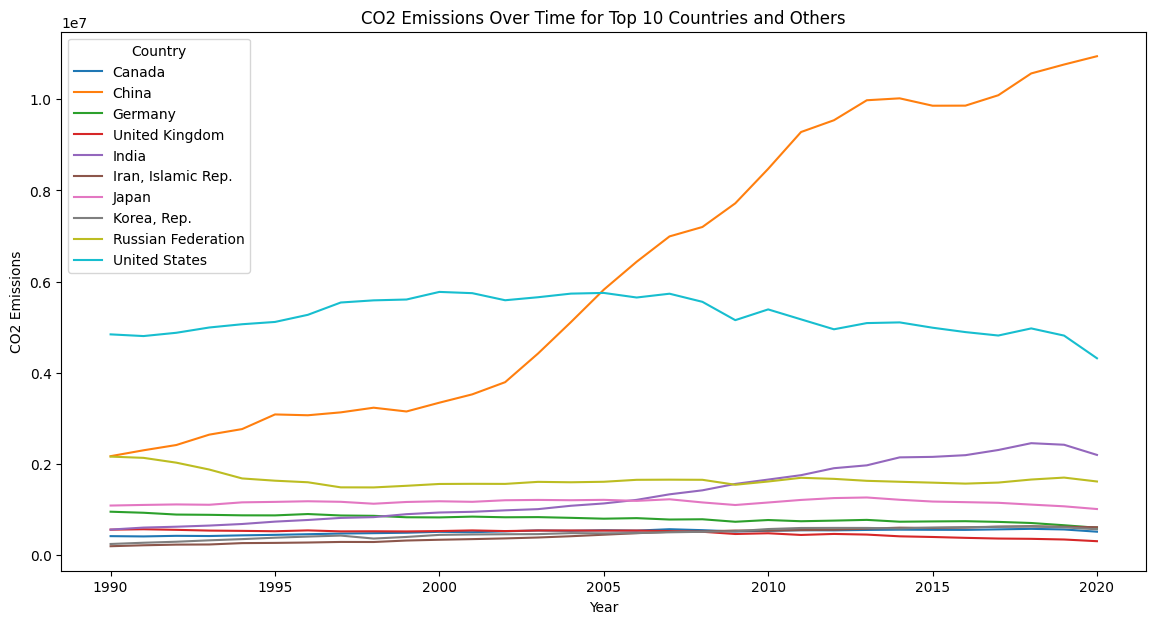

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top10, x='Year', y='CO2_Emissions', hue='Country Name')
plt.title('CO2 Emissions Over Time for Top 10 Countries and Others')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend(title='Country')
plt.show()

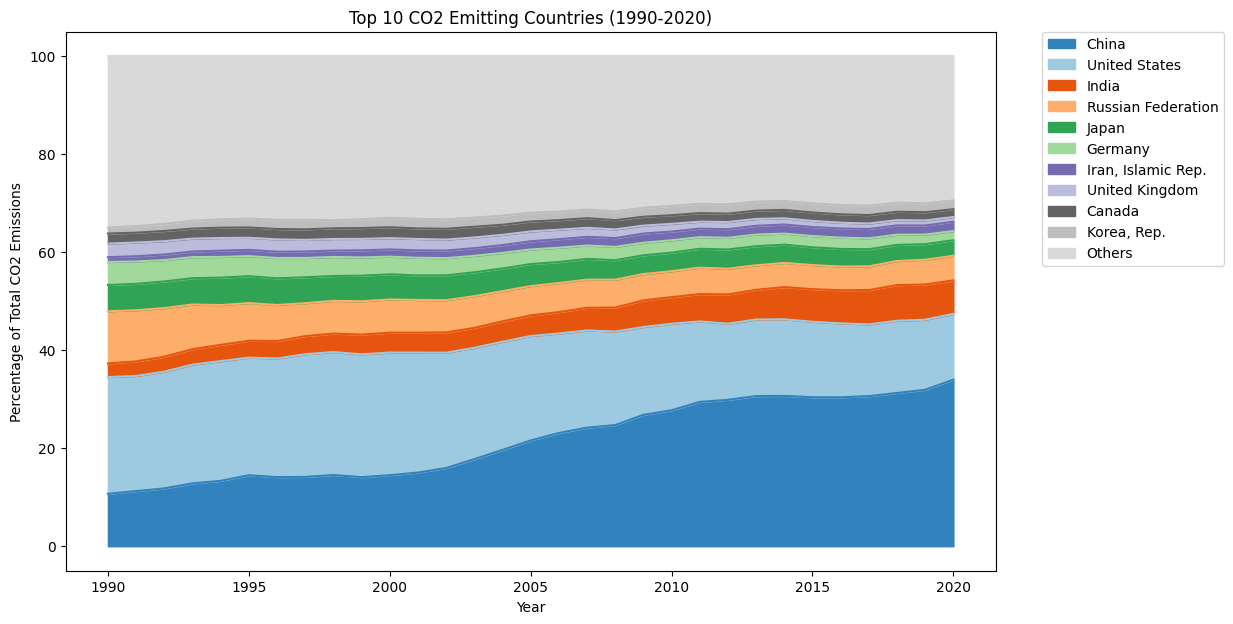

In [237]:
# Pivot the data for area plot
pivot_df = df_combined.pivot(index='Year', columns='Country Name', values='CO2_Emissions')

# Ensure "Others" is the last column
columns_order = ['China', 'United States', 'India', 'Russian Federation', 'Japan', 'Germany', 'Iran, Islamic Rep.', 'United Kingdom', 'Canada', 'Korea, Rep.', 'Others']
pivot_df = pivot_df[columns_order]

# Normalize the data to get percentages
pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# 100% Stacked Area Chart
pivot_df_percent.plot(kind='area', stacked=True, figsize=(12, 7), cmap='tab20c')
plt.title('Top 10 CO2 Emitting Countries (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Percentage of Total CO2 Emissions')
plt.legend(title='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [ ]:
plt.plot(df_long_co2[df_long_co2["Country Name"]])

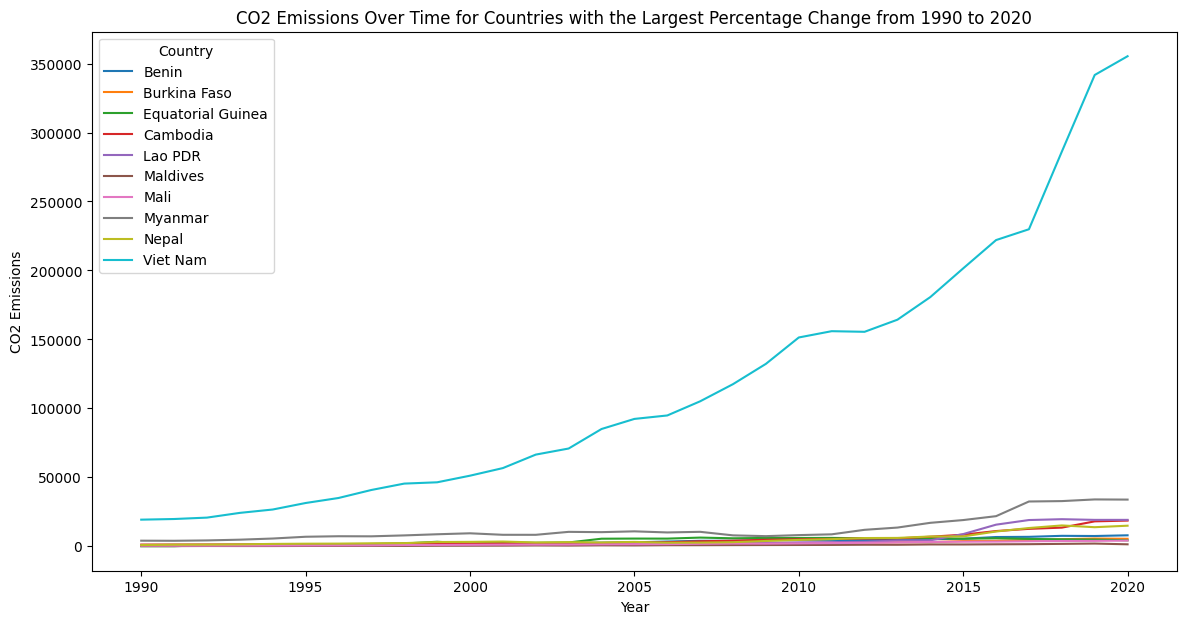

In [15]:
# Calculate the percentage change in emissions from 1990 to 2020 for each country
df_long_pivot = df_long_co2.pivot(index='Country Name', columns='Year', values='CO2_Emissions')
df_long_pivot['Percentage Change'] = ((df_long_pivot[2020] - df_long_pivot[1990]) / df_long_pivot[1990]) * 100

# Select the countries with the largest percentage changes
top_change_countries = df_long_pivot.nlargest(10, 'Percentage Change').index

# Filter the original dataframe to include only these countries
df_top_change = df_long_co2[df_long_co2['Country Name'].isin(top_change_countries)]
df_top_change["Percentage Change"] = df_top_change

# Plot the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top_change, x='Year', y='CO2_Emissions', hue='Country Name')
plt.title('CO2 Emissions Over Time for Countries with the Largest Percentage Change from 1990 to 2020')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend(title='Country')
plt.show()


# RNEW

In [199]:
df_rnew_world = df_long_rnew_group[df_long_rnew_group["Country Name"] == "World"]

In [200]:
df_rnew_world.columns

Index(['Country Name', 'Country Code', 'Year', 'Renewable_Energy_Percentage'], dtype='object')

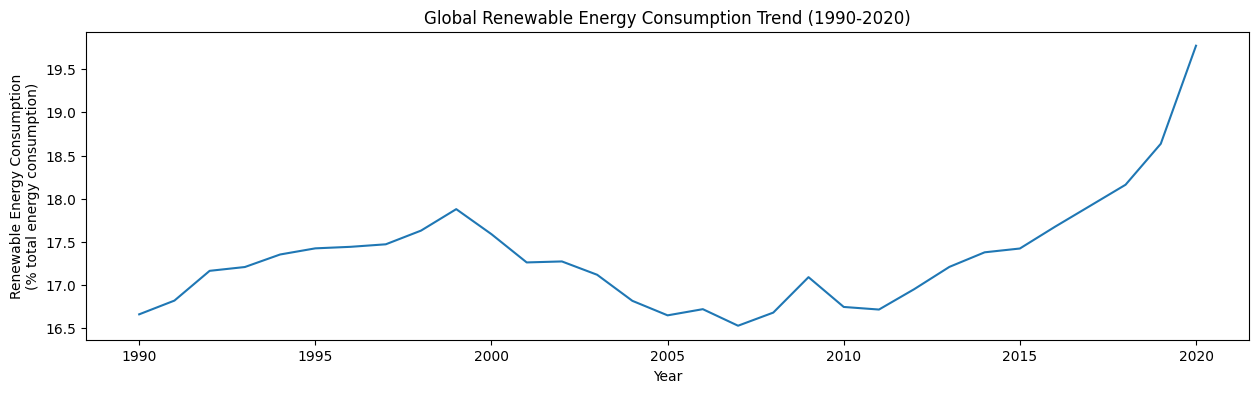

In [204]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_rnew_world, x='Year', y='Renewable_Energy_Percentage', hue='Country Name')
plt.title('Global Renewable Energy Consumption Trend (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Consumption\n(% total energy consumption)')
plt.legend([],[], frameon=False)
plt.show()

In [208]:
df_rnew_income_group.columns

Index(['Country Name', 'Country Code', 'Year', 'Renewable_Energy_Percentage'], dtype='object')

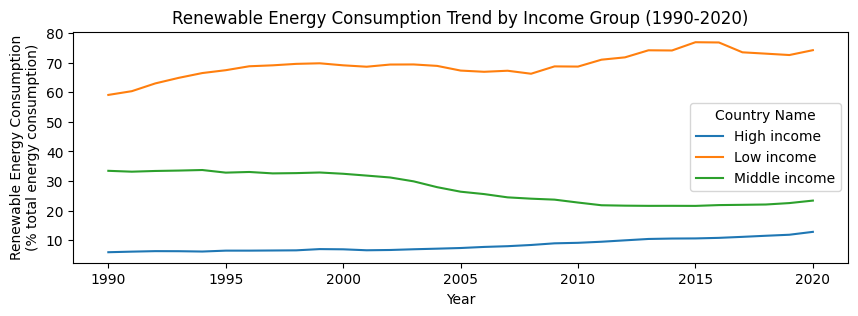

In [210]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=df_rnew_income_group, x='Year', y='Renewable_Energy_Percentage', hue='Country Name')
plt.title('Renewable Energy Consumption Trend by Income Group (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Consumption\n(% total energy consumption)')
plt.show()

In [13]:
df_rnew['Percentage Change'] = ((df_rnew['2020'] - df_rnew['1990']) / df_rnew['1990']) * 100

Text(0.5, 1.0, 'Renewable Energy Consumption of Top 10 Countries with the Largest Reduction in CO2 Emissions (1990-2020)')

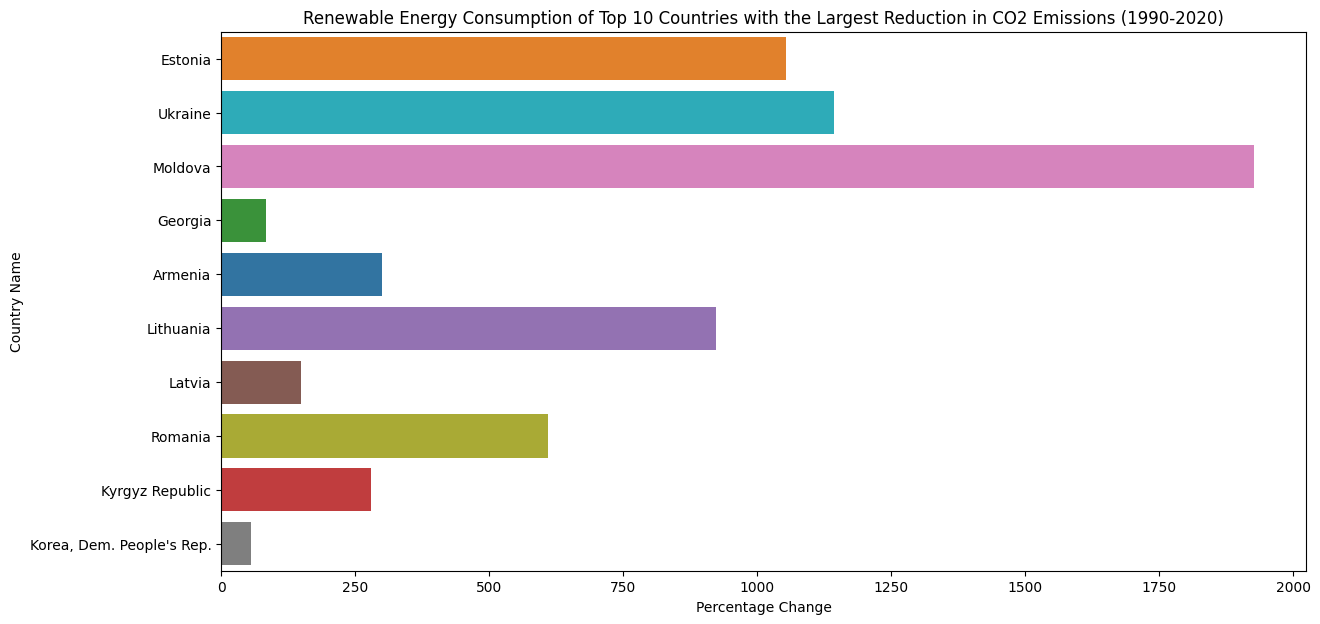

In [252]:
plt.figure(figsize=(14, 7))
df_rnew_decrease = df_rnew[df_rnew["Country Name"].isin(decrease_countries)]
sns.barplot(df_rnew_decrease, y="Country Name", x="Percentage Change", hue="Country Name", order=df_co2_decrease.sort_values("Percentage Change", ascending=False)["Country Name"])
plt.xlabel("Percentage Change")
plt.title("Renewable Energy Consumption of Top 10 Countries with the Largest Reduction in CO2 Emissions (1990-2020)")

In [36]:
# Calculate average renewable energy consumption for each country
avg_renewable_energy = df_long_rnew.groupby('Country Name')['Renewable_Energy_Percentage'].mean().reset_index()

# Sort by average renewable energy consumption in descending order
avg_renewable_energy = avg_renewable_energy.sort_values(by='Renewable_Energy_Percentage', ascending=False)

In [38]:
top_10_countries = avg_renewable_energy.head(10)

In [212]:
top_10_countries

,Country Name,Renewable_Energy_Percentage
36,"Congo, Dem. Rep.",96.467742
175,Uganda,94.351613
55,Ethiopia,94.025806
151,Somalia,92.654839
25,Burundi,92.593548
30,Central African Republic,92.000000
95,Liberia,89.783871
165,Tanzania,89.374194
18,Bhutan,88.496774
115,Mozambique,88.296774


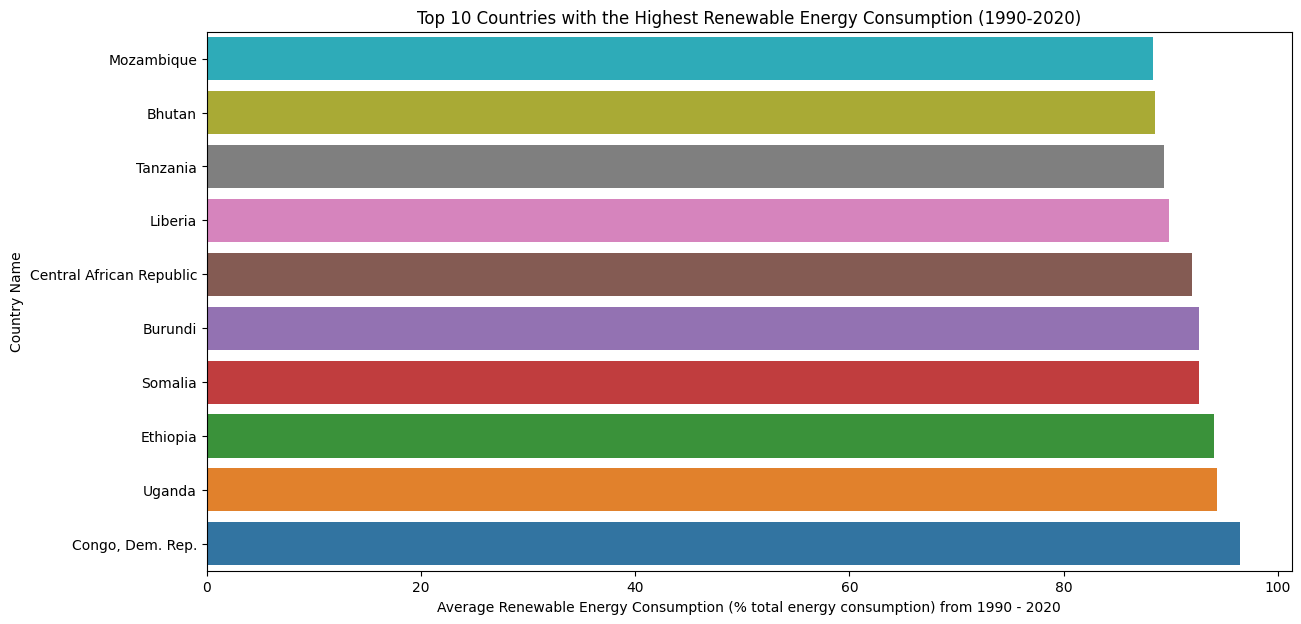

In [217]:
plt.figure(figsize=(14, 7))
sns.barplot(top_10_countries, y='Country Name', x='Renewable_Energy_Percentage', hue="Country Name")
plt.xlabel('Average Renewable Energy Consumption (% total energy consumption) from 1990 - 2020')
plt.title('Top 10 Countries with the Highest Renewable Energy Consumption (1990-2020)')
plt.gca().invert_yaxis()  # Invert y-axis to have the country with the highest value on top
plt.show()

In [226]:
df_rnew_top_co2 = df_long_rnew[df_long_rnew["Country Name"].isin(top_10_co2)]
df_rnew_top_co2.columns

Index(['Country Name', 'Country Code', 'Year', 'Renewable_Energy_Percentage'], dtype='object')

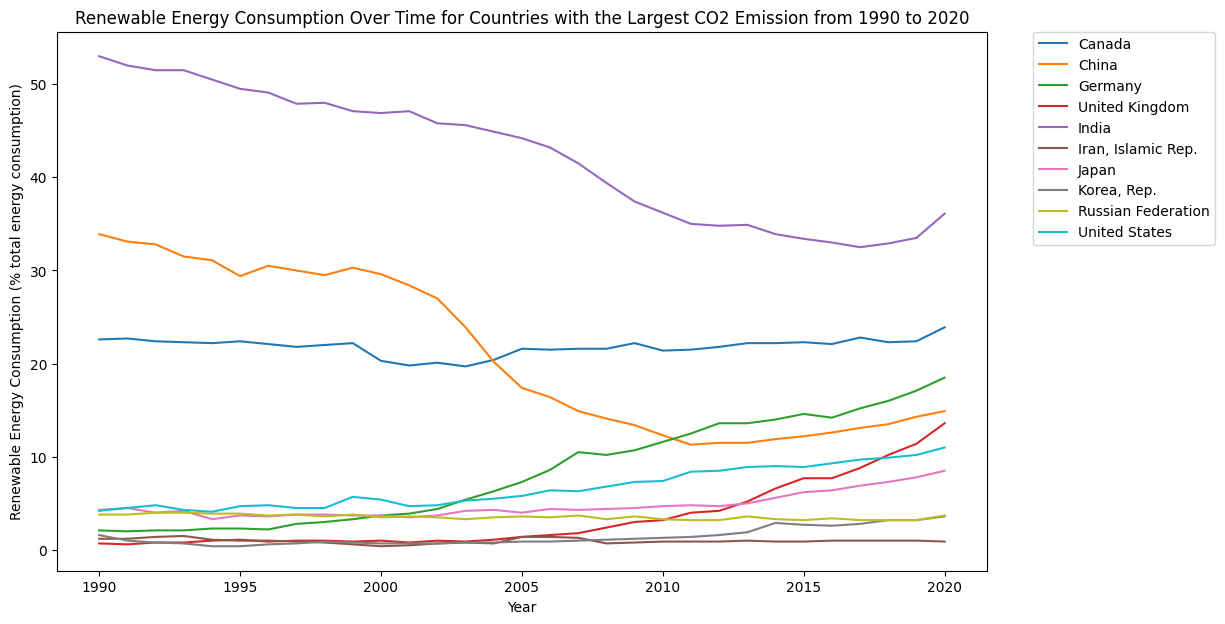

In [238]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_rnew_top_co2, x='Year', y='Renewable_Energy_Percentage', hue='Country Name')
plt.title('Renewable Energy Consumption Over Time for Countries with the Largest CO2 Emission from 1990 to 2020')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Consumption (% total energy consumption)')
plt.legend(title='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [243]:
df_rnew_top_decrease = df_long_rnew[df_long_rnew["Country Name"].isin(top_decrease_countries)]

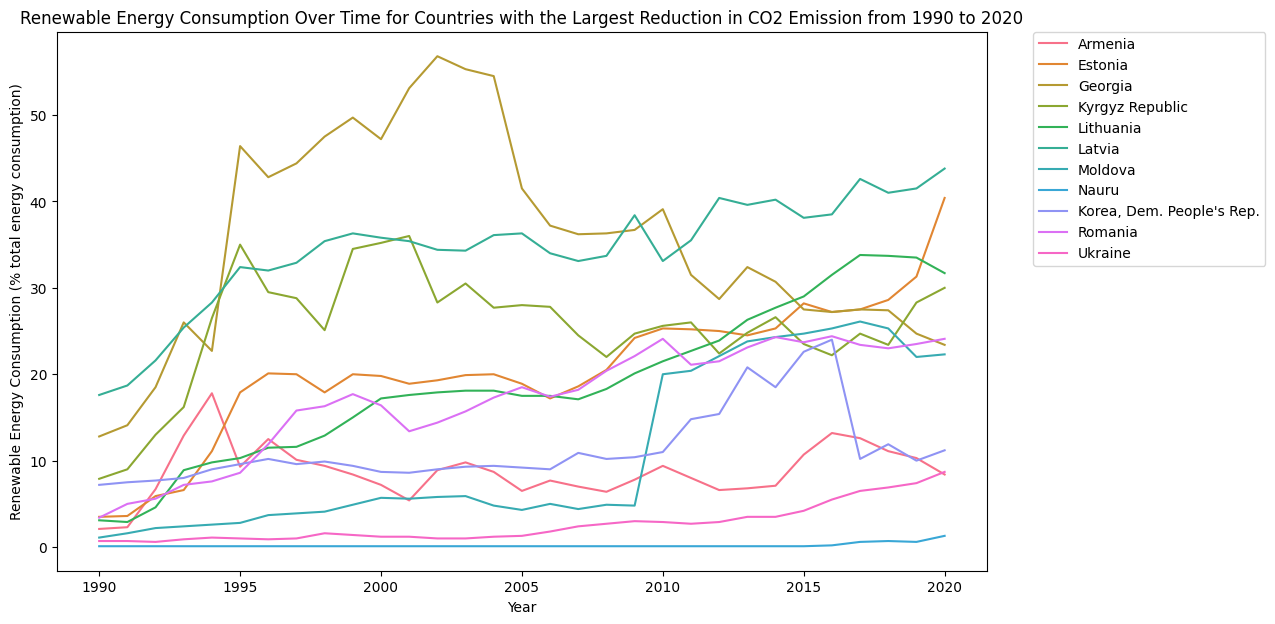

In [244]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_rnew_top_decrease, x='Year', y='Renewable_Energy_Percentage', hue='Country Name')
plt.title('Renewable Energy Consumption Over Time for Countries with the Largest Reduction in CO2 Emission from 1990 to 2020')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Consumption (% total energy consumption)')
plt.legend(title='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()